### Data Visualization

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # Stats Graphing
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py #graphing
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import squarify
from matplotlib import pyplot


from sklearn.preprocessing import LabelEncoder

In [176]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [230]:
df = pd.read_csv('GC_cleaned_new.csv')
df.head()

,Unnamed: 0,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_identity,Num Gen Id,gender_identity_b,racial_identity,Num Race Id,racial_identity_b,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,barrier_person_civil_rights_and_freedoms,barrier_person_disability_rights,barrier_person_economic_and_workers_rights,barrier_person_education_and_youth_empowerment,barrier_person_ending_violence_harassment_and_abuse,barrier_person_environmental_justice,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,woman,1,Cis Gender Woman or Woman,white,1,white,25 to 34,0,1,0,0,0,0,1,0,1,0,0,0,NaN,Cultural/Social,NaN,NaN,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,woman,1,Cis Gender Woman or Woman,white,1,white,25 to 34,0,0,0,0,1,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,NaN,0,Unknown,NaN,0,Unknown,NaN,0,0,0,1,1,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,woman,1,Cis Gender Woman or Woman,racial_identity_not_listed,0,Racial Identity Not Listed,45 to 54,0,0,1,0,1,0,0,0,0,0,1,0,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at wor

In [178]:
df = pd.read_csv('GC_cleaned_new.csv')
loc_df = pd.read_csv("./location_map.csv")
new_df = pd.merge(df['country_of_residence'], loc_df, left_on="country_of_residence", right_on="COUNTRY")
#print (new_df)
new_df = new_df.groupby(["country_of_residence", "CODE"]).aggregate('count').reset_index()
new_df = new_df[["country_of_residence", "CODE","COUNTRY"]]
print (new_df)
f = new_df['COUNTRY'].sum()
print(f)

                   country_of_residence CODE  COUNTRY
0                           Afghanistan  AFG      799
1                               Albania  ALB        3
2                               Algeria  DZA       14
3                               Andorra  AND        7
4                                Angola  AGO      121
5                              Anguilla  AIA        4
6                   Antigua and Barbuda  ATG        5
7                             Argentina  ARG       92
8                               Armenia  ARM       12
9                             Australia  AUS      241
10                              Austria  AUT       52
11                              Bahrain  BHR        5
12                           Bangladesh  BGD        6
13                             Barbados  BRB       16
14                              Belarus  BLR     2151
15                              Belgium  BEL       27
16                               Belize  BLZ        3
17                          

In [179]:
new_df.columns = ["country_of_residence", "Code", "Count"]
new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())

data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Count'],
        text = new_df['country_of_residence'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Count of respondents'),
      ) ]

layout = dict(
    title = 'Country wise number of respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

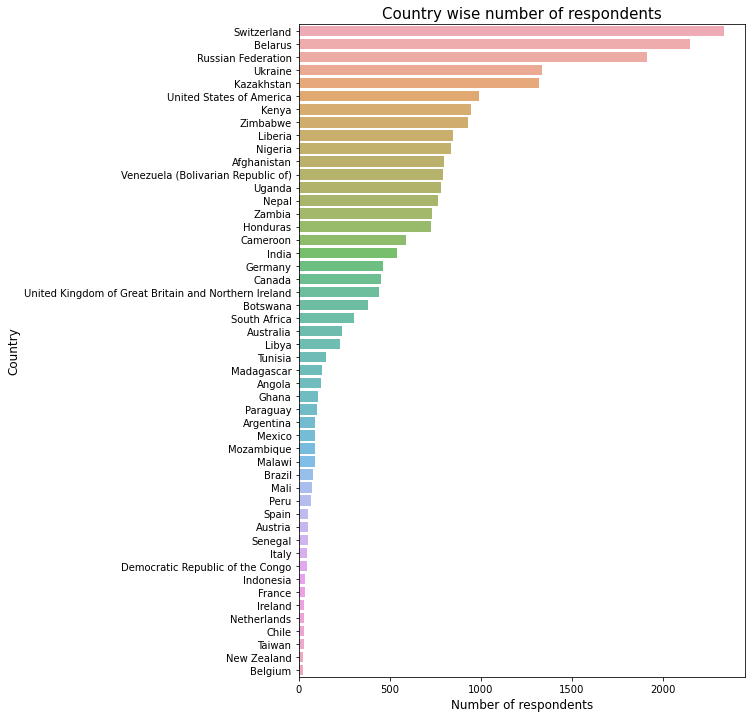

In [180]:
cnt_srs = df['country_of_residence'].value_counts().head(50)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

### Counrty vs Personal Issues

In [181]:
a =df['country_of_residence']
#a['country_of_residence'].replace("United Kingdom of Great Britain and Northern Ireland_","United States")
b=df.loc[:,'issue_person_civil_rights_and_freedoms':'issue_person_sexual_reproductive_and_parental_health']
b.columns = b.columns.str.replace("issue_city_","")
#a['country_of_residence'].replace("United Kingdom of Great Britain and Northern Ireland_","United States")
b.head()

,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health
0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,1,0,0,0


In [182]:
x = pd.concat([a, b], axis=1, join='inner')
x = x.groupby("country_of_residence").filter(lambda x: len(x) >= 50)

#z = x['country_of_residence'].value_counts()


x =x.groupby("country_of_residence").agg(lambda x: f"{int(x.sum() / x.count() * 100)}")
x = x.astype(float)

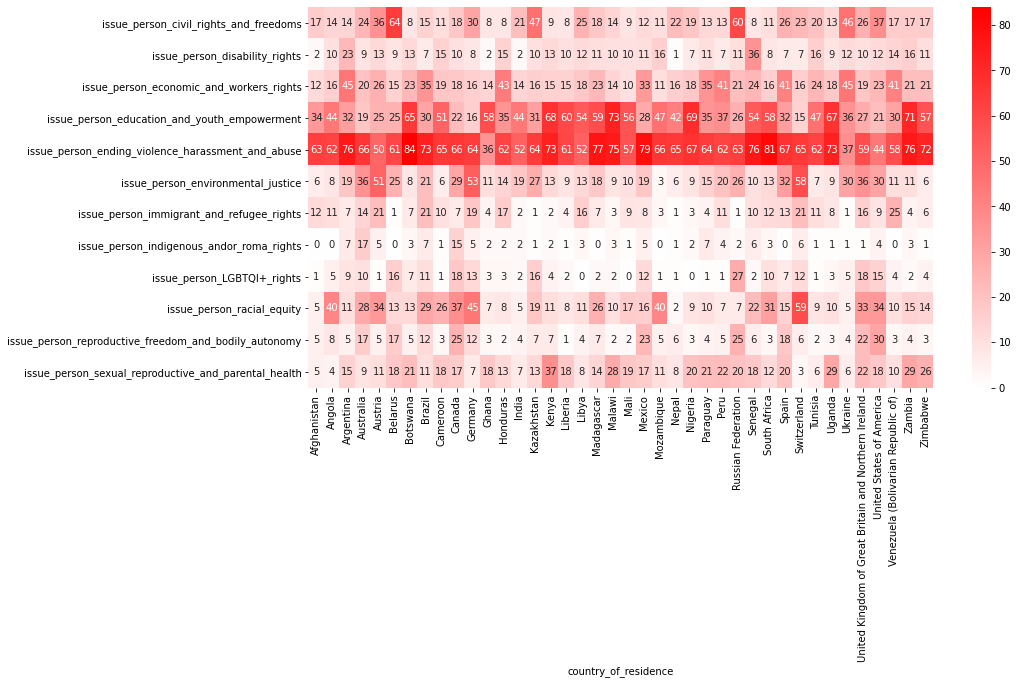

In [183]:
a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(x.T,center=0,annot = True,cmap="bwr")

#### Countries that reportes >70% for ending voilence harrasment and abuse
Botswana(80%),South Afric(81%),Mexixo(79%),Madagascar(77%),Senegal(76%), Malawi(75%). All other countries reported this issue on avereage of >60%

#### Counties that reported >60% for educationa and youth empowerment
Zimbambwe(71%),Malawi(73%),Nigeria(69%),Kenya(68%),Uganda(67%),Botswan(65%),Liberia(60%)

#### Environmental Justise 
Switzerland(58%), Germanay(53%), Austria(51%)

#### Civil rights and freedom
Balarus(64%),Russia(60%),Lazakhstan(47%), Ukrine(46%)

#### Economic and workers rigths
Ukrine & Argentian(45%),Hondurus(43%), Peru,spain and Venzuela(41%)

#### Racial Equity
Switzerland(59%)
germany(45%)
Angola(40%)

### Gender identity vs personal issues

In [184]:
df = pd.read_csv('xfs.csv')
df.set_index('gender_identity_b', inplace=True)
df.dtypes

civil_rights_and_freedoms                   float64
disability_rights                           float64
economic_and_workers_rights                 float64
education_and_youth_empowerment             float64
ending_violence_harassment_and_abuse        float64
environmental_justice                       float64
immigrant_and_refugee_rights                float64
indigenous_andor_roma_rights                float64
LGBTQI+_rights                              float64
racial_equity                               float64
reproductive_freedom_and_bodily_autonomy    float64
sexual_reproductive_and_parental_health     float64
dtype: object

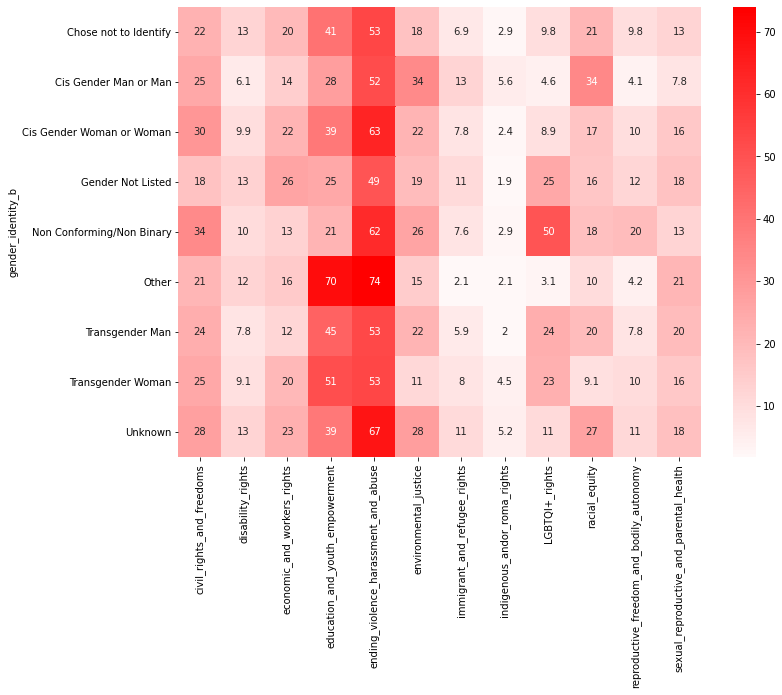

In [185]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(df,center=0,annot = True,cmap="bwr")

#### Summary 
1. Ending voilence harrassment and abbuse was repoted more then 50% in all groups, more than 60% was reported in the cis gender women or women,non confirmin/non binary and other. Highest was reported was 67% from the group unkown.
2. education and youth empowerment was also the common issue. Hihest was recorded by 'other' i.e, 70%, followed by transgender woman (51%),Transgender man(45%) and unkown (39%)
3. 50% of non confirming/non binary reported LGBTQ+ rights


### Age vs personal issues

In [186]:
df1 = pd.read_csv('age_vs_pi.csv')
df1.set_index('age', inplace=True,)
df1.head()

,civil_rights_and_freedoms,disability_rights,economic_and_workers_rights,education_and_youth_empowerment,ending_violence_harassment_and_abuse,environmental_justice,immigrant_and_refugee_rights,indigenous_andor_roma_rights,LGBTQI+_rights,racial_equity,reproductive_freedom_and_bodily_autonomy,sexual_reproductive_and_parental_health
age,,,,,,,,,,,,
18 to 24,31,8,14,40,66,19,6,1,17,16,12,16
25 to 34,28,9,19,41,63,18,7,2,7,15,11,20
35 to 44,25,10,26,39,61,21,8,2,5,17,7,16
45 to 54,26,13,29,38,57,23,9,2,4,19,6,10
55 to 64,33,11,30,29,52,32,9,4,4,21,5,6


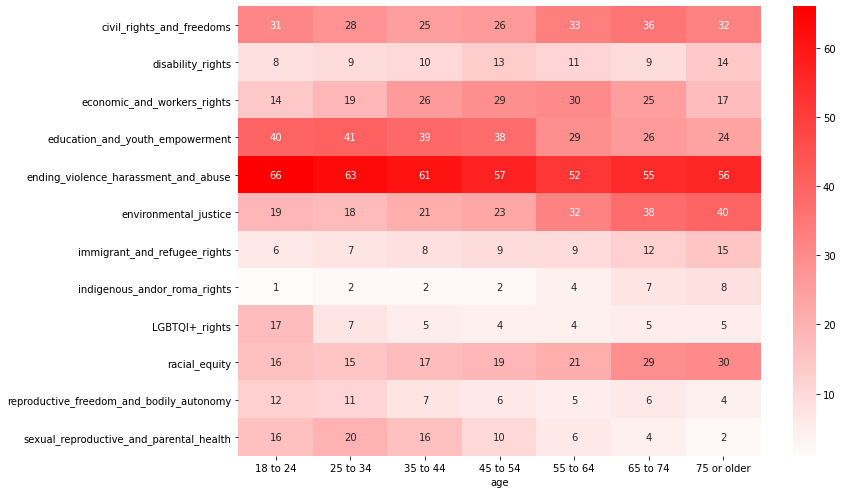

In [187]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(df1.T,center=0,annot = True,cmap="bwr")

#### Summary
1. Ending voilence harrassment and abbuse was repoted more then 50% in all age groups, more than 60% was reported in the age group between 18 to 44.
2. Education and youth empowermet was reported above 40% in the age group of 18-34. 
3. More than 30% reported  civil rights and freedoms in all age groups, highest was reported in the age group of 65-74 i.e, 36%.
4. 40% reported environmental justice in the age group of 75 or older. The pattern in the heat map indicates that this concern increases with incresae in age. 

### Race identity vs personal issues


In [189]:
df2 = pd.read_csv('r_vs_pi.csv')
df2.set_index('racial_identity_b', inplace=True)
df2

,civil_rights_and_freedoms,disability_rights,economic_and_workers_rights,education_and_youth_empowerment,ending_violence_harassment_and_abuse,environmental_justice,immigrant_and_refugee_rights,indigenous_andor_roma_rights,LGBTQI+_rights,racial_equity,reproductive_freedom_and_bodily_autonomy,sexual_reproductive_and_parental_health
racial_identity_b,,,,,,,,,,,,
Biracial or Mixed,33,9,19,29,62,32,9,4,14,27,12,11
Choose not to Identify,25,11,22,39,57,20,6,1,6,15,6,11
Racial Identity Not Listed,39,10,23,34,58,25,5,2,13,16,11,15
Unknown,27,12,23,38,67,28,10,5,10,26,11,18
asian,27,5,15,37,65,14,6,1,6,10,5,9
black_or_of_african_descent,13,10,18,61,70,8,7,1,3,16,4,24
hispanic_or_latinx,16,12,38,31,65,13,21,2,4,11,5,12
indigenous,31,8,23,36,52,24,6,5,3,15,2,7
indigenous_central_or_south_american,13,10,34,41,53,20,13,5,4,11,4,12


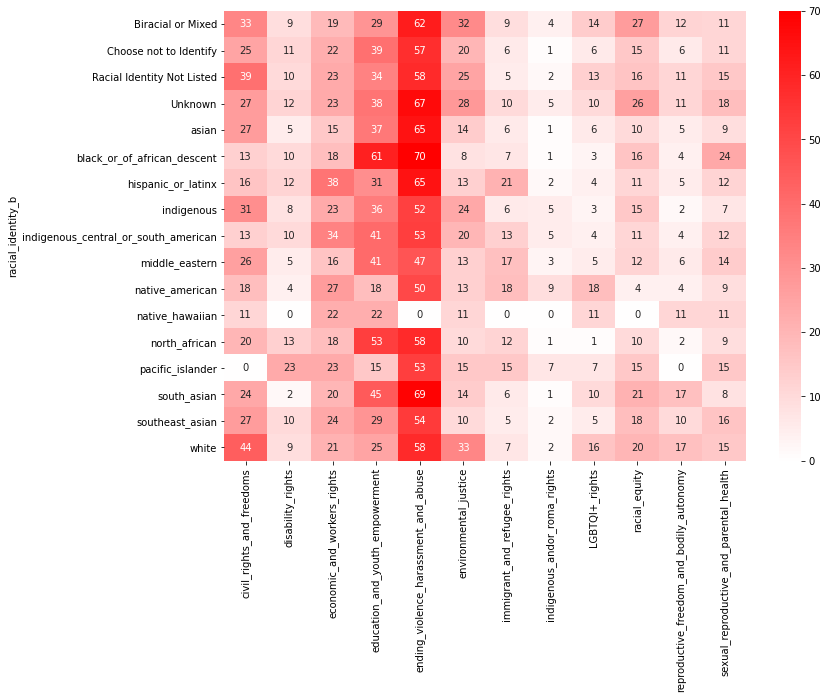

In [190]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(df2,center=0,annot = True,cmap="bwr")

#### Summary
1. Ending voilence harrassment and abbuse was repoted more then 50% in all races, more than 60% was reported in the Biracial or mixed(62%), unknwon(67%),asian(65%), hispanic or latinx(65%), south asian(69%) and hisghest is 70% in black or of african descent.
2. Apart from white, south east asian , pacific islander,native hawian,native american and biracial and mixed, all other races reported educational and youth empowerment issue greater than 30%. The black or of african descent reported 61% followed by north africa(53%), south asian(45%) and indidenous central or south african & middle eastern(41%).
3. Hispaniic or latinx and indegenous or south american races issued 38% and 34% issues related to economic and workers rights.
4. Civil rigths and freedoms was mostly reported by white(44%) followed by racial identity not listed(39%) ,biracial or mixed (33%) and indigenous (31%).
5. Environmental justice was reported by 33% of white followed by Biracial or mixed (32%)


### What percentage of respondents reported political/cultural/social/education/technological  barriers to ending Violence, Harassment, and Abuse?

In [191]:
df = pd.read_csv('GC_cleaned.csv')
br = df.loc[:,'barrier_person_civil_rights_and_freedoms':'barrier_person_sexual_reproductive_and_parental_health']
br.columns = br.columns.str.replace("barrier_person_","")
# no of respondents choosen cultural/social,economic,education,political,techonological in each barrier
br = br.apply(pd.Series.value_counts)
#calculating the percentage for each field
br = br.div(br.sum(axis=0))*100
#br = br*100
br.head()

,civil_rights_and_freedoms,disability_rights,economic_and_workers_rights,education_and_youth_empowerment,ending_violence_harassment_and_abuse,environmental_justice,immigrant_and_refugee_rights,indigenous_andor_roma_rights,LGBTQI+_rights,barrier_racial_equity,reproductive_freedom_and_bodily_autonomy,sexual_reproductive_and_parental_health
Cultural/Social,11.375750,31.455399,10.066635,11.361702,55.566592,17.912399,17.235189,25.823224,53.660886,47.047970,50.442478,38.752166
Economic,5.296469,24.882629,34.554974,28.042553,5.694893,24.231859,12.507481,12.651646,0.722543,7.986294,3.048181,13.518198
Education,6.928714,13.667188,7.448834,28.907801,12.565185,10.917411,6.941951,10.571924,8.718690,13.521349,13.077679,30.883882
Political,74.866755,23.787167,44.883389,27.205674,25.031040,39.747222,62.238181,49.740035,36.127168,30.574591,32.448378,13.864818
Technological,1.532312,6.207616,3.046168,4.482270,1.142290,7.191109,1.077199,1.213172,0.770713,0.869794,0.983284,2.980936


In [192]:
temp_series = df['barrier_person_ending_violence_harassment_and_abuse'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Barriers to ending Violence, Harassment, and Abuse'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="employmentstatus")

### What was the primary barrier to advocating for Reproductive Freedom and Bodily Autonomy?

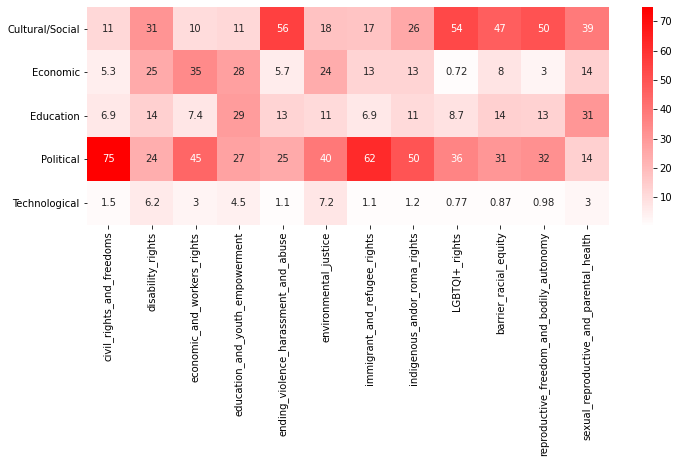

In [193]:
a4_dims = (11.7, 4)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(br,center=0,annot = True,cmap="bwr")

According to the heat map, the primary barrier to advocating for Reproductive freedom and bodily Autonomy is "Cultural/social"(50% respondents) followed by political(30% respondents)


In [194]:
temp_series = df['barrier_person_reproductive_freedom_and_bodily_autonomy'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title=' Primary barrier to advocating for Reproductive Freedom and Bodily Autonomy'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="employmentstatus")

### What primary barriers do transgender men identify in advocating for LGBTQI+ Rights?


In [195]:
#Creating a data frame with gender_identity and barrier's columns
df = pd.read_csv('GC_cleaned_new.csv')
df1 = df.loc[:,'barrier_person_civil_rights_and_freedoms':'barrier_person_sexual_reproductive_and_parental_health']
df2= df['gender_identity_b']
df3 = pd.concat([df1,df2],axis=1, join='inner')
df3.columns = df3.columns.str.replace("barrier_person_","")
df3.head()

,civil_rights_and_freedoms,disability_rights,economic_and_workers_rights,education_and_youth_empowerment,ending_violence_harassment_and_abuse,environmental_justice,immigrant_and_refugee_rights,indigenous_andor_roma_rights,LGBTQI+_rights,barrier_racial_equity,reproductive_freedom_and_bodily_autonomy,sexual_reproductive_and_parental_health,gender_identity_b
0,NaN,Cultural/Social,NaN,NaN,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,Cis Gender Woman or Woman
1,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,Cis Gender Woman or Woman
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,Cultural/Social,NaN,Cis Gender Woman or Woman
4,NaN,NaN,Economic,NaN,NaN,NaN,Political,NaN,Political,NaN,NaN,NaN,Gender Not Listed


In [196]:
#selcting the columns with string that contains 'transgender_man'
df4 = df3[df3['gender_identity_b'].str.match('Transgender Man',na=False)] 
df4['gender_identity_b'].value_counts()




Transgender Man    51
Name: gender_identity_b, dtype: int64

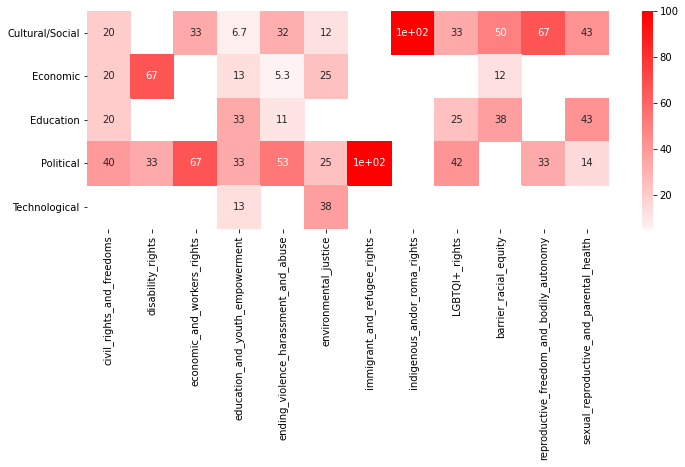

In [197]:
df = df4.loc[:,'civil_rights_and_freedoms':'sexual_reproductive_and_parental_health']
# no of respondents choosen cultural/social,economic,education,political,techonological in each barrier
df = df.apply(pd.Series.value_counts)
#calculating the percentage for each field
df = df.div(df.sum(axis=0))*100

a4_dims = (11.7, 4)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(df,center=0,annot = True,cmap="bwr")

In [198]:
temp_series = df4['LGBTQI+_rights'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Primary barriers do transgender men identify in advocating for LGBTQI+ Rights'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LGBTQI+_rights")

### What primary barriers do Hispanic or Latinx women identify in advocating for Racial Equality? 

In [218]:
#Creating a data frame with racial_identity and barrier's columns
df = pd.read_csv('GC_cleaned_new.csv')
df1 = df.loc[:,'barrier_person_civil_rights_and_freedoms':'barrier_person_sexual_reproductive_and_parental_health']
df2= df[['racial_identity','gender_identity']]
df3 = pd.concat([df1,df2],axis=1, join='inner')
df3.columns = df3.columns.str.replace("barrier_person_","")


In [222]:
#selecting the columns with string that contains 'hispanic_or_latinx'
df4 = df3[df3['gender_identity'].str.match('woman',na=False)] 
df5 = df4[df4['racial_identity'].str.match('hispanic_or_latinx',na=False)]
df5['racial_identity'].value_counts()


hispanic_or_latinx                                                                                                                                                          830
hispanic_or_latinxwhite                                                                                                                                                      44
hispanic_or_latinxindigenous_central_or_south_american                                                                                                                       13
hispanic_or_latinxindigenous                                                                                                                                                  4
hispanic_or_latinxnative_american                                                                                                                                             2
hispanic_or_latinxsoutheast_asian                                                                                       

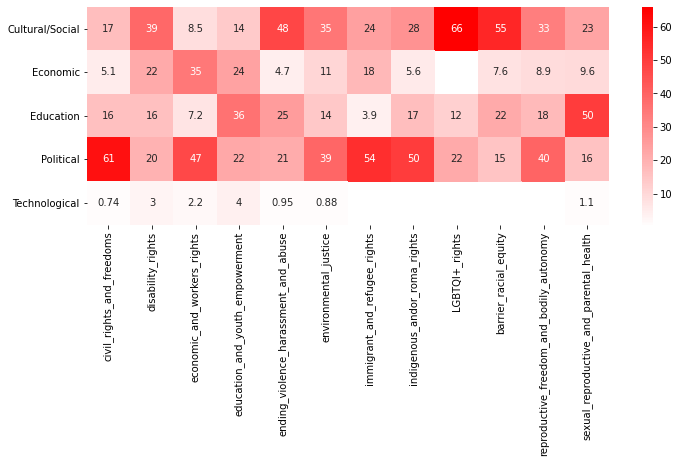

In [225]:
df = df5.loc[:,'civil_rights_and_freedoms':'sexual_reproductive_and_parental_health']
# no of respondents choosen cultural/social,economic,education,political,techonological in each barrier
df = df.apply(pd.Series.value_counts)
#calculating the percentage for each field
df = df.div(df.sum(axis=0))*100

a4_dims = (11.7, 4)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(df,center=0,annot = True,cmap="bwr")

In [226]:
temp_series = df5['barrier_racial_equity'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Primary barriers do Hispanic or Latinx women identify in advocating for Racial Equality'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LGBTQI+_rights")

## Which critical issues are most likely to appear together in respondents’ answers?

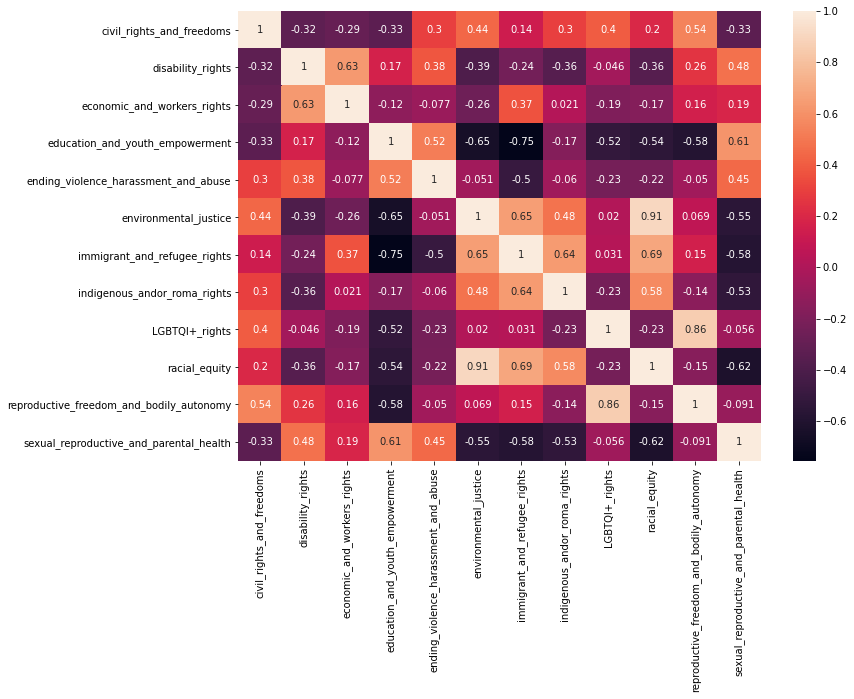

In [229]:
df = pd.read_csv('xfs.csv')
df=df.loc[:,'civil_rights_and_freedoms':'sexual_reproductive_and_parental_health']
#df.columns = df.columns.str.replace("issue_person_","")


corrMatrix = df.corr()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(corrMatrix, annot=True)
plt.show()